In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

# PCA (principal component analysis - 주성분 분석)

### 주성분 : 데이터에서의 주된 분산의 방향으로 일반적으로 feature 개수 만큼 존재한다.
#### 아래 그림에서 두개의 화살표가 각각 주성분이다.

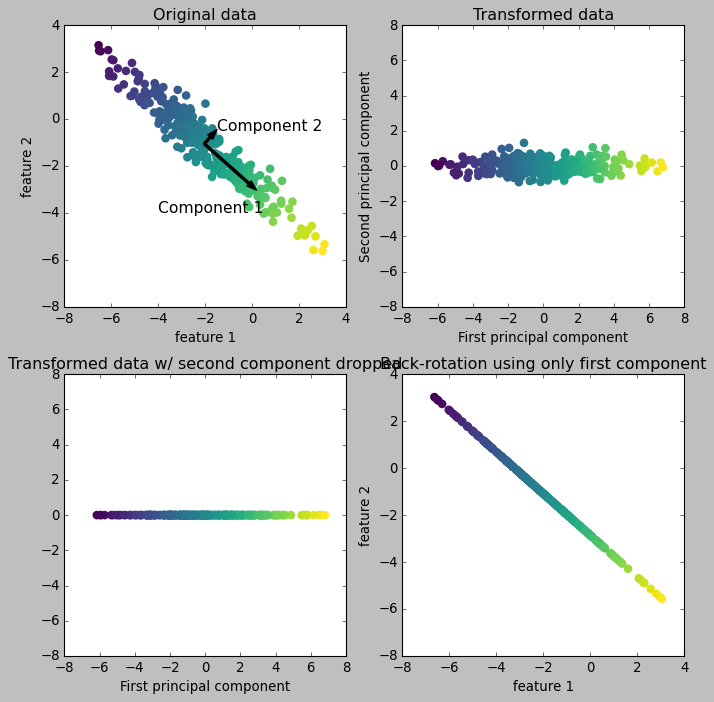

In [2]:
# 첫번째 주성분만 남기고 두번째 주성분은 제외한다.
mglearn.plots.plot_pca_illustration()

In [3]:
# feature 의 개수가 너무 많아 각각의 상관관계를 분석하기 어려운 경우
# 분류 문제일 경우 feature 별로 어떤 데이터가 어떤 class로 분류되는지 히스토그램을 그릴 수 있다.

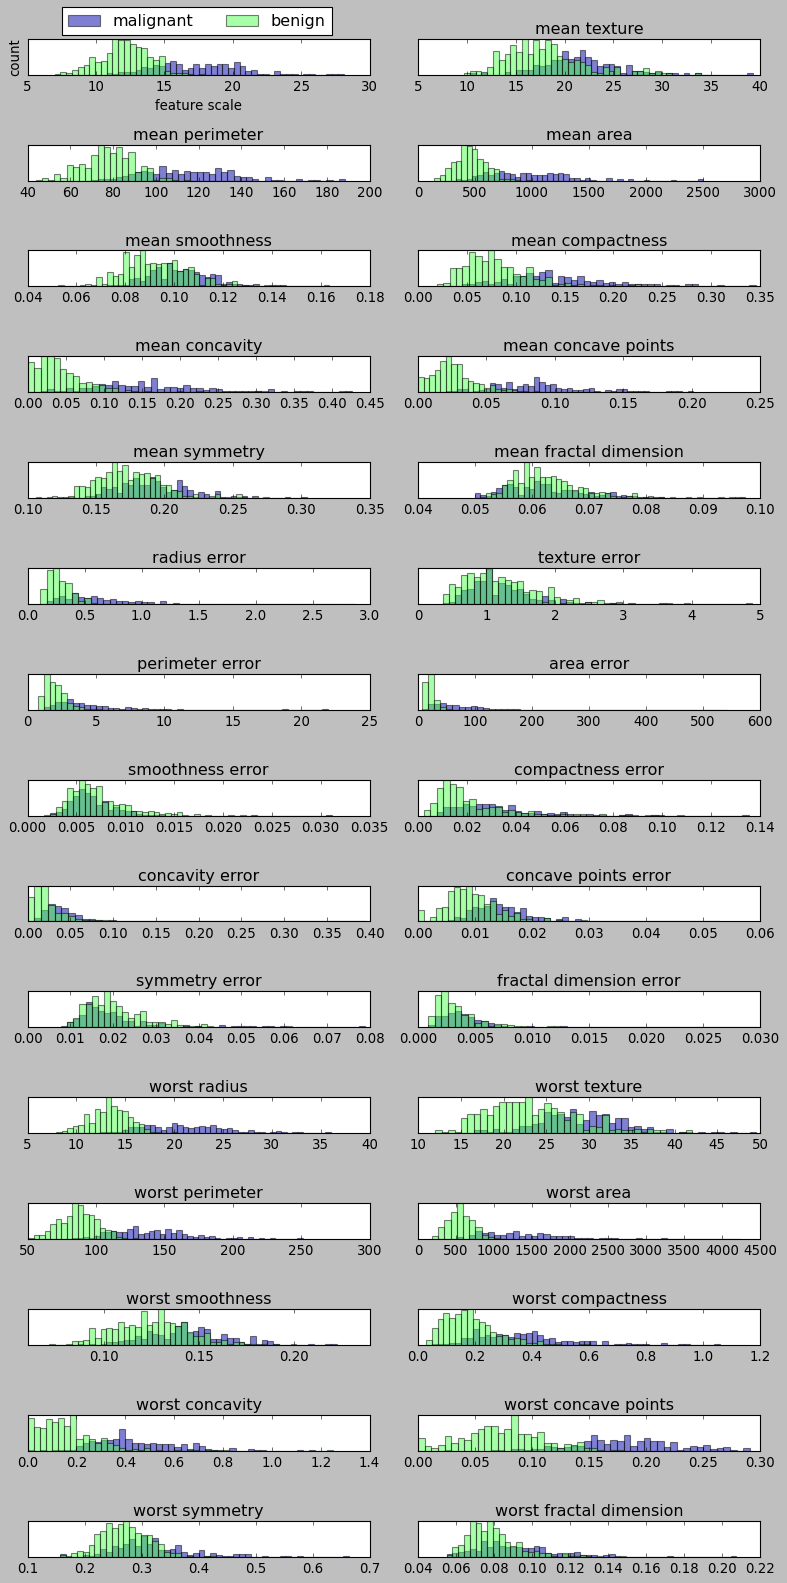

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

for i, ax in enumerate(axes.ravel()) :
    # 히스토그램의 각각의 구간이 같아 질 수 있도록 한다.
    _,bins = np.histogram(cancer.data[:,i], bins = 50)
    ax.hist(malignant[:,i], bins = bins, color = mglearn.cm3(0), alpha=0.5)
    ax.hist(benign[:,i], bins = bins, color = mglearn.cm3(2), alpha=0.5)
    ax.set_title(cancer.feature_names[i])
    ax.set_yticks(())
axes[0][0].set_xlabel("feature scale")
axes[0][0].set_ylabel("count")
axes[0][0].legend(["malignant", "benign"], loc = (0.1, 1.1), ncol = 2)
fig.tight_layout()
    


### 위 그래프는 각각의 특성과 분류 결과의 관계를 파악하는데는 유용하나
### 특성간의 관계는 알 수 없다. 
### 이때 PCA 를 사용하면 도움이 된다.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)

X_scaled = scaler.transform(cancer.data)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터의 형태 :", X_scaled.shape)
print("축소된 데이터의 형태 : ", X_pca.shape)

원본 데이터의 형태 : (569, 30)
축소된 데이터의 형태 :  (569, 2)


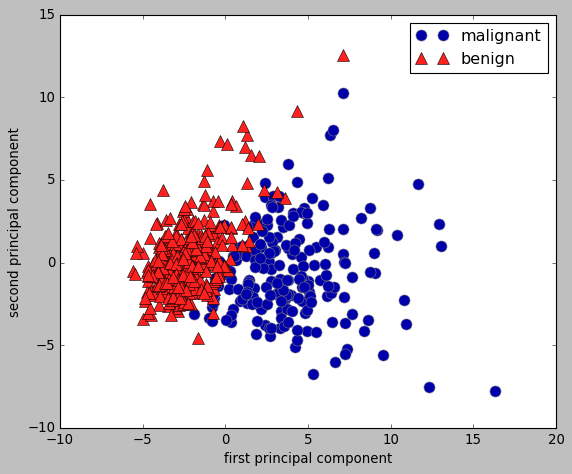

In [7]:
# 주성분 2개로 분해해도 데이터가 잘 구분됨을 확인할 수 있다.
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target, c=mglearn.cm2.colors)
plt.legend(["malignant","benign"], loc = 'best')
plt.gca().set_aspect("equal")
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

In [8]:
# pca.components_ 에 주성분이 행별로 크기순으로 저장되어있다. 각 열은 특성에 대응하는 값이다.
print("pca.components_ shape : ", pca.components_.shape)


pca.components_ shape :  (2, 30)


In [9]:
print("pca.components : \n", pca.components_)

pca.components : 
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


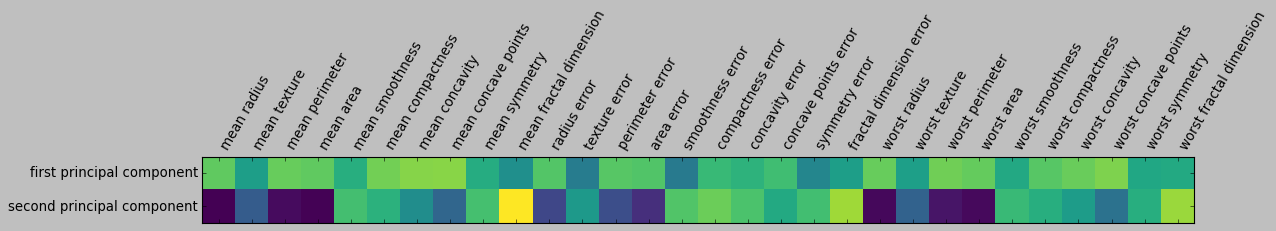

In [10]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1], ['first principal component', 'second principal component'])
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation = 60, ha = 'left')
plt.show()

# 고유 얼굴(eigenface) 특성추출

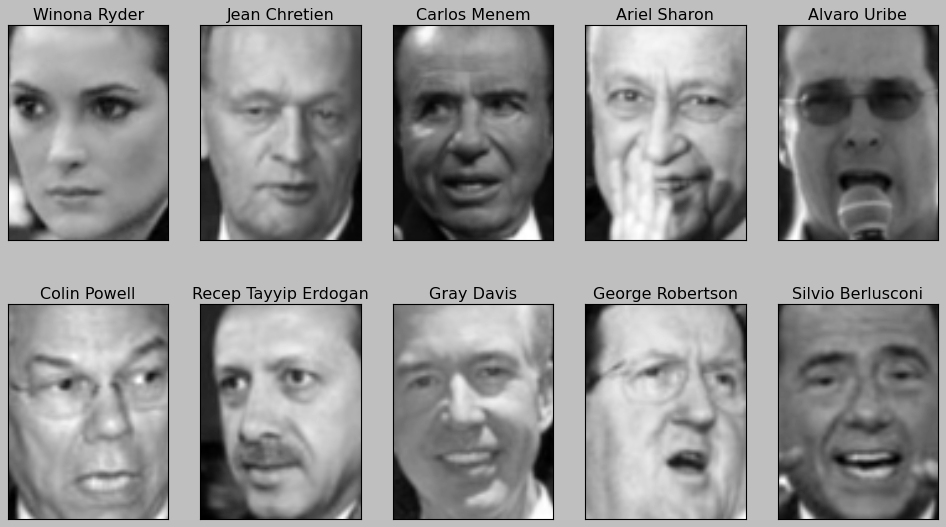

In [11]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

# images 는 87*65 픽셀로 이루어져 있다.
image_shape = people.images[0].shape

# 앞 10 사람의 이미지만 보여준다.
fig, axes = plt.subplots(2,5, figsize=(15,8), subplot_kw={'xticks' : (), 'yticks' :()})

for target, image, ax in zip(people.target, people.images, axes.ravel()) :
    ax.imshow(image, cmap='gray')
    ax.set_title(people.target_names[target])

In [12]:
print("people.images.shape:", people.images.shape)
print("n_classes : ", len(people.target_names))

people.images.shape: (3023, 87, 65)
n_classes :  62


In [13]:
# 데이터가 일부 사람에게 편중되어있다.

counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)) :
    print(f"{name:<25} {count:>3}", end = '    ')
    if i%3==2 : print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                71    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             52    Jean Chretien              55    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


In [14]:
# 사람마다 최대 50개의 이미지만 사용
mask = np.zeros(people.target.shape, dtype=bool)

for target in np.unique(people.target) :
    # np.where은 조건식의 맞는 index 배열을 반환한다.
    # mask에서 해당 배열의 50번째 까지만 True 로 변환한다.
    mask[np.where(people.target==target)[0][:50]] = True
    
X_people = people.data[mask]
y_people = people.target[mask]

# 흑백 이미지 값(0~255) 를 (0~1)까지로 조정
X_people /= 255
    

### 분류기를 사용할 경우 분류할 클래스는 많고 각 클래스마다의 샘플은 적기 때문에 잘 작동하지 않는다.

In [15]:
# 1-knn 을 사용하는 경우
# 이미지를 구분하는 경우 한 픽셀만 이미지가 이동해도 완전히 다른 이미지로 인식하기 때문에
# 훈련 성과가 좋지 않다.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, 
                                                    stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(f"1-knn score = {knn.score(X_test, y_test):0.4f}")


1-knn score = 0.2326


### Whiten : PCA를 적용한 이후 StandardScaler 를 적용해 준다.

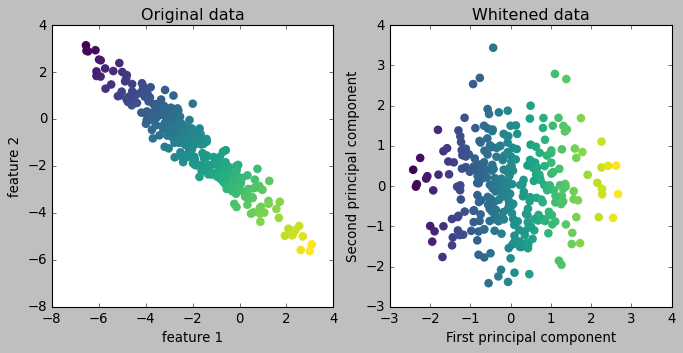

In [16]:
mglearn.plots.plot_pca_whitening()

### PCA 에서도 데이터 전처리 떄와 마찬가지로 
### train set만으로 pca를 fit 하고 이를 train set 과 test set에 transform 한다.

In [18]:
pca = PCA(n_components=100, whiten = True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape : ", X_train_pca.shape)

X_train_pca.shape :  (1547, 100)


In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
# pca를 하기 전보다 훈련 성과는 좋으나 knn의 한계 때문에 여전히 낮다.
print(f"test score : {knn.score(X_test_pca, y_test):0.3f}")

test score : 0.312


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log = LogisticRegression().fit(X_train_pca, y_train)
svc = SVC(C=10).fit(X_train_pca, y_train)

print(f"LogisticRegression test score : {log.score(X_test_pca, y_test):0.3f}")
print(f"SVC test score : {svc.score(X_test_pca, y_test):0.3f}")


LogisticRegression test score : 0.506
SVC test score : 0.525


In [39]:
print("pca.components_.shape :", pca.components_.shape)

pca.components_.shape : (100, 5655)


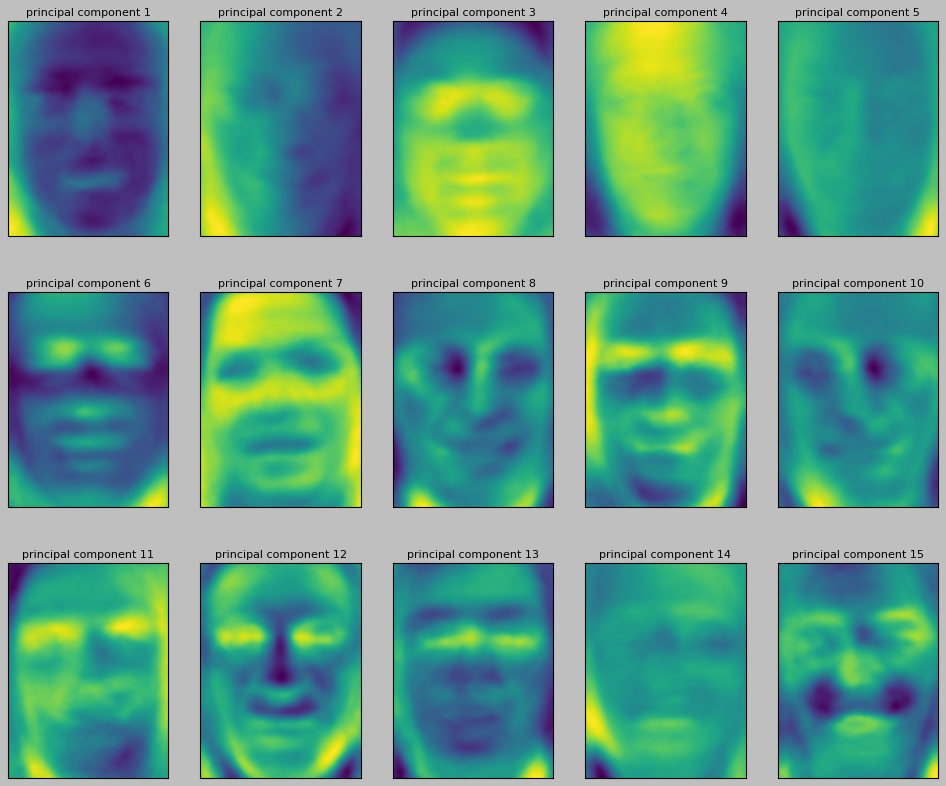

In [45]:
# 주성분 확인
fig, axes = plt.subplots(3,5,figsize = (15,12), subplot_kw={'xticks':(), 'yticks' : ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())) :
    ax.imshow(component.reshape(image_shape), cmap = 'viridis')
    ax.set_title(f"principal component {i+1}", fontdict={"fontsize" : 10}) 

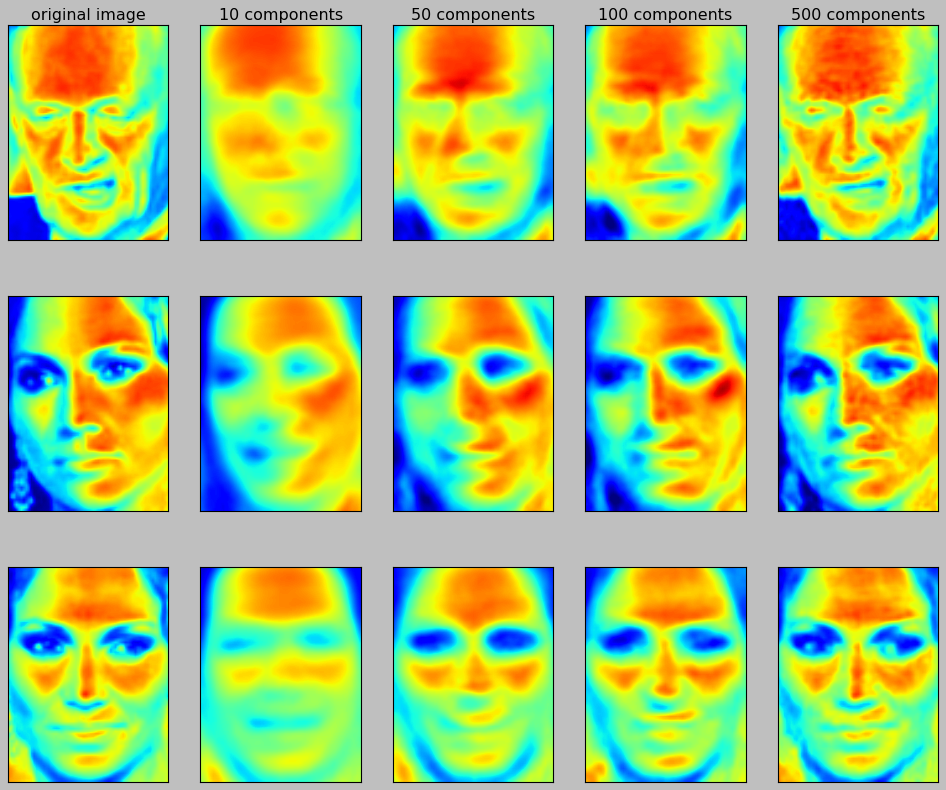

In [48]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

## 주성분이 얼마만큼의 분산을 표현하는지 파악하여 주성분의 개수를 효과적으로 정할 수 있다.

In [50]:
# 주성분을 100개로 하였을 경우 표현할 수 있는 얼굴 데이터의 분산은 약 90%이다.
np.sum(pca.explained_variance_ratio_)

0.902775

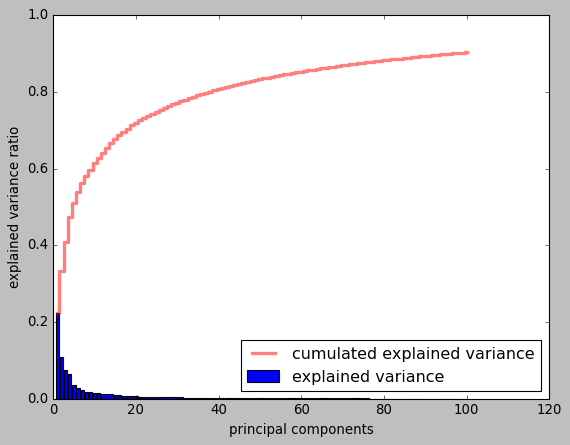

In [55]:
plt.bar(range(1,101), pca.explained_variance_ratio_,
        align = 'center', label = 'explained variance')

plt.step(range(1,101), np.cumsum(pca.explained_variance_ratio_), alpha = 0.5,
         where = 'mid', label = 'cumulated explained variance', lw= 3, c = 'r')
plt.xlabel("principal components")
plt.ylabel("explained variance ratio")
plt.legend(loc = 'best')
plt.show()

### 주성분의 개수가 20개 정도일 때까지 분산이 급격히 오르고
### 40개가 넘어가는 부분부터는 잘 오르지 않는 것을 확인할 수 있다.
### 따라서 주성분을 40개 정도로 정해도 100개로 정했을 때와 훈련 성과는 크게 차이 나지 않는다,

In [56]:
pca = PCA(n_components=40, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn.fit(X_train_pca, y_train)

# 주성분이 100개 일 때 score 가 0.312 인 것과 비교해서 거의 똑같음(오히려 오름)
print(f"test score : {knn.score(X_test_pca, y_test):0.3f}")

test score : 0.316


### 분산의 비율로 주성분의 개수를 정할 수도 있다.

In [58]:
pca = PCA(n_components=0.8, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn.fit(X_train_pca, y_train)
print(f"test score : {knn.score(X_test_pca, y_test):0.3f}")
print("n_components : ", pca.n_components_) 

test score : 0.298
n_components :  38
